In [1]:
# Import modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [34]:
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 5400)
pd.set_option("display.max_colwidth", 500)

In [35]:
# Import datasets

# questions = pd.read_csv("questions_only.csv")
# other = pd.read_csv("other_text_responses.csv")
# surv = pd.read_csv("survey_schema.csv")
df = pd.read_csv("multiple_choice_responses.csv", low_memory=False)



In [33]:
#multi.iloc[0]

In [5]:
# If we want to drop the other text extra columns. Still under investigation
# multi2 = multi[multi.columns.drop(list(multi.filter(regex='OTHER_TEXT')))]

In [36]:
multi.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_OTHER_TEXT,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q13_OTHER_TEXT,Q14,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,Q14_Part_5_TEXT,Q14_OTHER_TEXT,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_OTHER_TEXT,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_Part_12,Q17_OTHER_TEXT,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q18_Part_11,Q18_Part_12,Q18_OTHER_TEXT,Q19,Q19_OTHER_TEXT,Q20_Part_1,Q20_Part_2,Q20_Part_3,Q20_Part_4,Q20_Part_5,Q20_Part_6,Q20_Part_7,Q20_Part_8,Q20_Part_9,Q20_Part_10,Q20_Part_11,Q20_Part_12,Q20_OTHER_TEXT,Q21_Part_1,Q21_Part_2,Q21_Part_3,Q21_Part_4,Q21_Part_5,Q21_OTHER_TEXT,Q22,Q23,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q24_Part_8,Q24_Part_9,Q24_Part_10,Q24_Part_11,Q24_Part_12,Q24_OTHER_TEXT,Q25_Part_1,Q25_Part_2,Q25_Part_3,Q25_Part_4,Q25_Part_5,Q25_Part_6,Q25_Part_7,Q25_Part_8,Q25_OTHER_TEXT,Q26_Part_1,Q26_Part_2,Q26_Part_3,Q26_Part_4,Q26_Part_5,Q26_Part_6,Q26_Part_7,Q26_OTHER_TEXT,Q27_Part_1,Q27_Part_2,Q27_Part_3,Q27_Part_4,Q27_Part_5,Q27_Part_6,Q27_OTHER_TEXT,Q28_Part_1,Q28_Part_2,Q28_Part_3,Q28_Part_4,Q28_Part_5,Q28_Part_6,Q28_Part_7,Q28_Part_8,Q28_Part_9,Q28_Part_10,Q28_Part_11,Q28_Part_12,Q28_OTHER_TEXT,Q29_Part_1,Q29_Part_2,Q29_Part_3,Q29_Part_4,Q29_Part_5,Q29_Part_6,Q29_Part_7,Q29_Part_8,Q29_Part_9,Q29_Part_10,Q29_Part_11,Q29_Part_12,Q29_OTHER_TEXT,Q30_Part_1,Q30_Part_2,Q30_Part_3,Q30_Part_4,Q30_Part_5,Q30_Part_6,Q30_Part_7,Q30_Part_8,Q30_Part_9,Q30_Part_10,Q30_Part_11,Q30_Part_12,Q30_OTHER_TEXT,Q31_Part_1,Q31_Part_2,Q31_Part_3,Q31_Part_4,Q31_Part_5,Q31_Part_6,Q31_Part_7,Q31_Part_8,Q31_Part_9,Q31_Part_10,Q31_Part_11,Q31_Part_12,Q31_OTHER_TEXT,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q32_OTHER_TEXT,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe - Text,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Other - Text,What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,Does your current employer incorporate machine learning methods into their business?,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Analyze and understand data to influence product or business decisions,"Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data",Select any activities that make up an important part of you

In [7]:
gender_dist = multi["Q2"].value_counts().drop(labels="What is your gender? - Selected Choice")
gender_dist

Male                       16138
Female                      3212
Prefer not to say            318
Prefer to self-describe       49
Name: Q2, dtype: int64

In [9]:
# Dive deeper into gender section
# Perform some cleaning too

#gender_mean_salary = multi.groupby("Q2").mean()["Q10"]

In [10]:
yearly_salaries = multi["Q10"].value_counts().drop(labels="What is your current yearly compensation (approximate $USD)?")

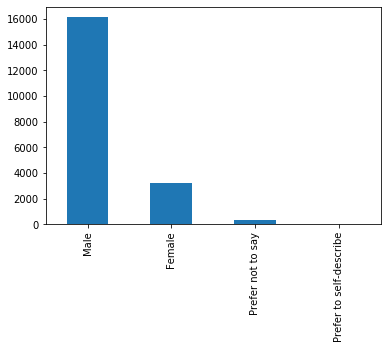

In [11]:
gender_dist.plot(kind="bar");

In [12]:
education_dist = multi["Q4"].value_counts().drop(labels="What is the highest level of formal education that you have attained or plan to attain within the next 2 years?")
education_dist

Master’s degree                                                      8549
Bachelor’s degree                                                    5993
Doctoral degree                                                      2767
Some college/university study without earning a bachelor’s degree     837
Professional degree                                                   611
I prefer not to answer                                                333
No formal education past high school                                  233
Name: Q4, dtype: int64

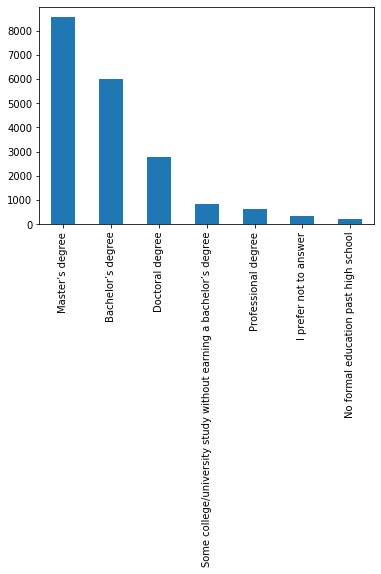

In [13]:
education_dist.plot(kind="bar");

In [14]:
country_dist = multi["Q3"].value_counts().drop(labels="In which country do you currently reside?")
country_dist


India                                                   4786
United States of America                                3085
Other                                                   1054
Brazil                                                   728
Japan                                                    673
Russia                                                   626
China                                                    574
Germany                                                  531
United Kingdom of Great Britain and Northern Ireland     482
Canada                                                   450
Spain                                                    399
Nigeria                                                  395
France                                                   387
Taiwan                                                   301
Turkey                                                   288
Italy                                                    271
Australia               

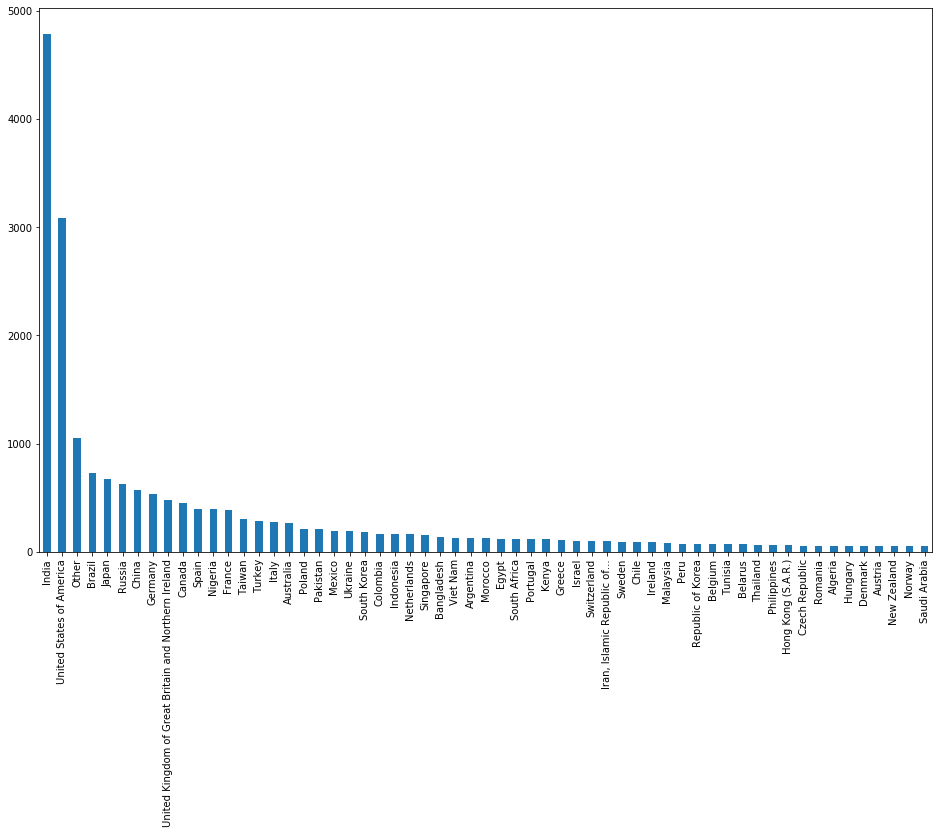

In [15]:
country_dist.plot(kind="bar", figsize=(16, 10));

In [16]:
discipline_dist = multi["Q5"].value_counts().drop(labels="Select the title most similar to your current role (or most recent title if retired): - Selected Choice")
discipline_dist

Data Scientist             4085
Student                    4014
Software Engineer          2705
Other                      1690
Data Analyst               1598
Research Scientist         1470
Not employed                942
Business Analyst            778
Product/Project Manager     723
Data Engineer               624
Statistician                322
DBA/Database Engineer       156
Name: Q5, dtype: int64

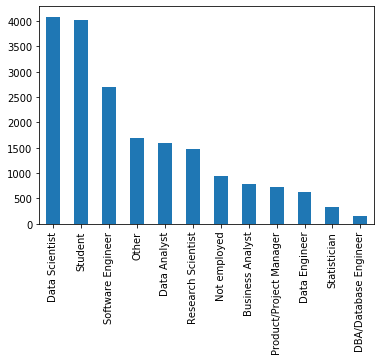

In [17]:
discipline_dist.plot(kind="bar");

In [18]:
years = multi["Q15"].value_counts().drop(labels="How long have you been writing code to analyze data (at work or at school)?")

In [19]:
years

1-2 years                    4061
< 1 years                    3828
3-5 years                    3365
5-10 years                   1887
10-20 years                  1045
I have never written code     865
20+ years                     576
Name: Q15, dtype: int64

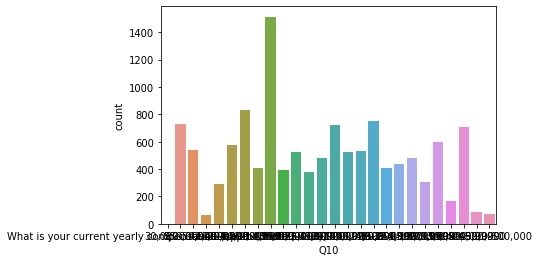

In [37]:
sns.countplot(multi['Q10']);

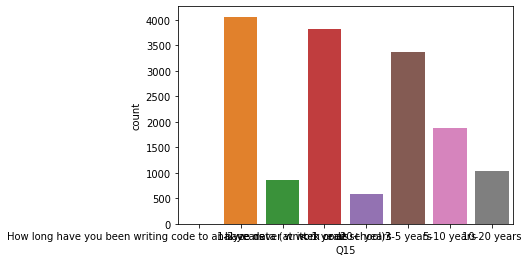

In [24]:
sns.countplot(multi['Q15']);

## Focusing on India and USA comparison

In [45]:
india = df[df["Q3"] == "India"]
usa = df[df["Q3"] == "United States of America"]

In [46]:
india_male_count = len(india[india["Q2"] == "Male"])
india_female_count = len(india[india["Q2"] == "Female"])

In [47]:
usa_male_count = len(usa[usa["Q2"] == "Male"])
usa_female_count = len(usa[usa["Q2"] == "Female"])